In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> 🔻Step 1 | Chargement du jeu de données</span>

In [33]:
data=pd.read_csv("../../data/raw/german_credit_data.xls")
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [40]:
data['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [3]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [41]:
cat_cols = [col for col in data.columns if data[col].dtypes == 'O']

for col in cat_cols:
    print(data[col].value_counts(), "\n------------------------\n")


Sex
male      690
female    310
Name: count, dtype: int64 
------------------------

Housing
own     713
rent    179
free    108
Name: count, dtype: int64 
------------------------

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64 
------------------------

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64 
------------------------

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64 
------------------------

Risk
good    700
bad     300
Name: count, dtype: int64 
------------------------



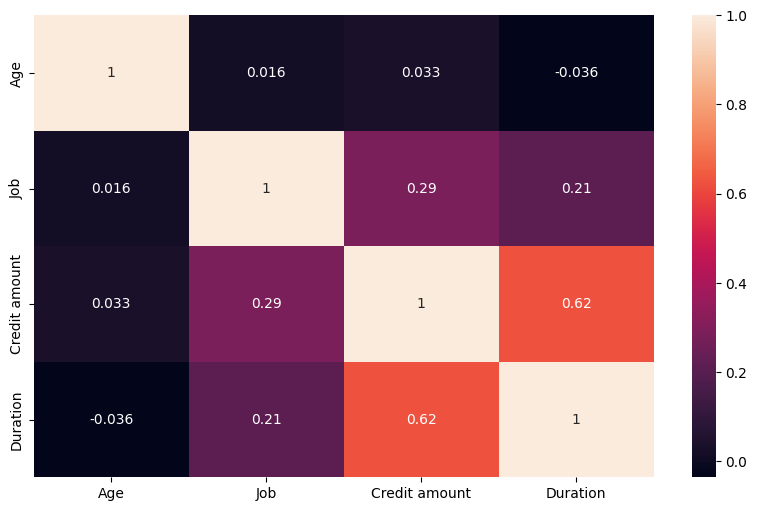

In [6]:
num_cols = [col for col in data.columns if data[col].dtype in ['int64'] and col not in ['Unnamed: 0']]
plt.figure(figsize=(10,6))
sns.heatmap(data[num_cols].corr(), annot=True)
plt.show()

Correlation entre Duration et Credit amount

# <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> 🔻Step 2 |Preparations des données </span>

## <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> 🔻Step 2.1 Détection et gestion des valeurs manquantes</span>

###  <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> a.Détection des valeurs manquantes</span>

In [42]:
data.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

###  <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> b.Gestion des valeurs manquantes</span>

In [43]:
#evaluation du pourcentage de valeur manquantes pour saving accounts et credit account

n1=(data["Saving accounts"].isna().sum()/1000)*100
n2=(data["Checking account"].isna().sum()/1000)*100

n1,n2

(np.float64(18.3), np.float64(39.4))

n1 et n2 etant supperieur a 5% alors on ne peut pas supprimer les donnees

In [44]:
data[data["Saving accounts"].isna()]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
16,16,53,male,2,own,NaN,NaN,2424,24,radio/TV,good
17,17,25,male,2,own,NaN,little,8072,30,business,good
24,24,26,male,2,own,NaN,NaN,2069,10,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...,...
968,968,29,male,2,rent,NaN,NaN,7166,42,radio/TV,good
977,977,42,male,2,own,NaN,moderate,2427,18,business,good
990,990,37,male,1,own,NaN,NaN,3565,12,education,good
992,992,23,male,1,rent,NaN,little,1936,18,radio/TV,good


In [45]:
pd.crosstab(data[data['Saving accounts'].isna()]['Sex'], data[data["Saving accounts"].isna()]['Housing'])

Housing,free,own,rent
Sex,,,
female,1,30,18
male,22,100,12


In [46]:
data[data["Saving accounts"].isna()].fillna(0).groupby("Job")["Saving accounts"].count()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_16864\1300973556.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[data["Saving accounts"].isna()].fillna(0).groupby("Job")["Saving accounts"].count()


Job
0      5
1     29
2    120
3     29
Name: Saving accounts, dtype: int64

Ce tableau croisé nous permet de constater qu'il y a également des femmes dans les données manquantes des comptes courants. De plus, nous ne nous sommes pas seulement au genre, nous avons égalements testé les autres catégories et avons remarqué que les données manquantes sont distribuées. Ceci nous laisse supposé que les données manquantes sont de types MCAR

In [47]:
data["Saving accounts"].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [48]:
data[data["Checking account"].isna()].fillna(0).groupby("Risk")["Checking account"].count()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_16864\1669107391.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[data["Checking account"].isna()].fillna(0).groupby("Risk")["Checking account"].count()


Risk
bad      46
good    348
Name: Checking account, dtype: int64

In [49]:
data[data["Checking account"].isna()].fillna(0).groupby("Job")["Checking account"].count()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_16864\3812440419.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[data["Checking account"].isna()].fillna(0).groupby("Job")["Checking account"].count()


Job
0      3
1     70
2    266
3     55
Name: Checking account, dtype: int64

Total values of the most missing variable: 
Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


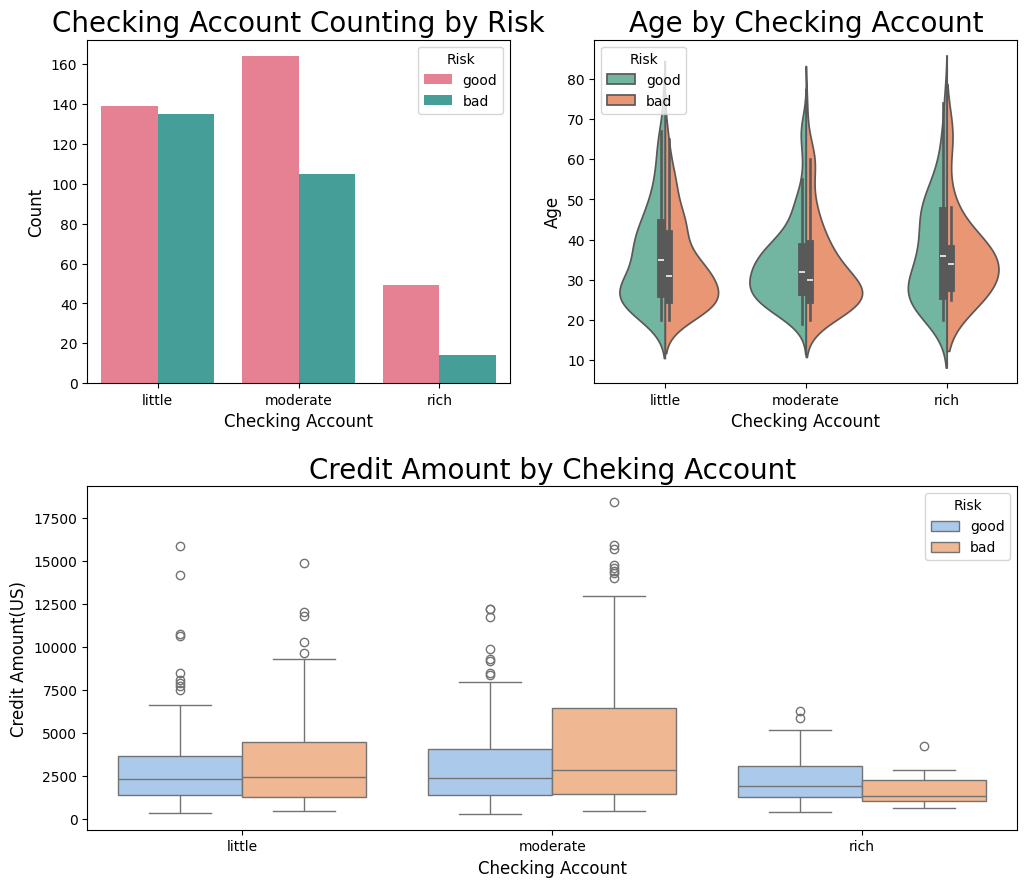

In [50]:
print("Total values of the most missing variable: ")
print(data.groupby("Checking account")["Checking account"].count())

plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="Checking account", data=data,
              palette="husl", hue="Risk")
g.set_xlabel("Checking Account", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Checking Account Counting by Risk", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="Checking account", y="Age", data=data, palette="Set2", hue = "Risk",split=True)
g1.set_xlabel("Checking Account", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Age by Checking Account", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="Checking account",y="Credit amount", data=data,hue='Risk',palette="pastel")
g2.set_xlabel("Checking Account", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)
g2.set_title("Credit Amount by Cheking Account", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

plt.show()
plt.show()

In [51]:
### Remplacement par la categories la plus frequentes (Saving account)
#data["Saving accounts"].fillna(data['Saving accounts'].mode()[0], inplace=True)

### Remplacement par la categorie Unknonnw

In [52]:
data["Saving accounts"].fillna("unknown", inplace=True)
data["Checking account"].fillna("unknown", inplace=True)

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_16864\3473932153.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Saving accounts"].fillna("unknown", inplace=True)
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_16864\3473932153.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [53]:
data.isna().sum().sum()

np.int64(0)

In [54]:
#Remplacer les valleurs manquantes par la modalité la plus fréquente
#data["Checking account"].fillna(data["Checking account"].mode()[0],inplace=True)
# Remplacer les valeurs manquante par la médiane
#data['Checking account'].fillna(data['Checking account'].median()[0], inplace=True)

In [55]:
data["Checking account"]

0        little
1      moderate
2       unknown
3        little
4        little
         ...   
995     unknown
996      little
997     unknown
998      little
999    moderate
Name: Checking account, Length: 1000, dtype: object

## <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> 🔻Step 2.2 Détection et gestion des valeurs aberrantes</span>

In [56]:

def visualize_outliers(df, columns):
    """
    Visualise les valeurs aberrantes dans les colonnes numériques spécifiées à l'aide de box plots.

    :param df: DataFrame contenant les données
    :param columns: Liste des colonnes numériques à visualiser
    """
    for column in columns:
        if column in df and df[column].dtype in [np.int64, np.float64]:  # Vérifie si la colonne est numérique
            plt.figure(figsize=(8, 6))  # Crée une nouvelle figure pour chaque colonne
            sns.boxplot(x=df[column])  # Crée un box plot pour la colonne
            plt.title(f"Box Plot de {column}")  # Définit le titre du graphique
            plt.xlabel(column)  # Définit le label de l'axe x
            plt.show()  # Affiche le graphique

def treat_outliers_with_median(df, columns):
    """
    Traite les valeurs aberrantes dans les colonnes spécifiées en les remplaçant par la médiane.
    Les valeurs aberrantes sont détectées en utilisant la méthode de l'écart interquartile (IQR).

    :param df: DataFrame contenant les données
    :param columns: Liste des colonnes à traiter
    :return: DataFrame avec les valeurs aberrantes imputées
    """
    for column in columns:
        if column in df:
            # Calcul des percentiles et de l'IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Calcul de la médiane
            median_value = df[column].mean()

            # Remplacer les valeurs aberrantes par la médiane
            df[column] = df[column].apply(
                lambda x: median_value if (x < lower_bound or x > upper_bound) else x
            )
    return df

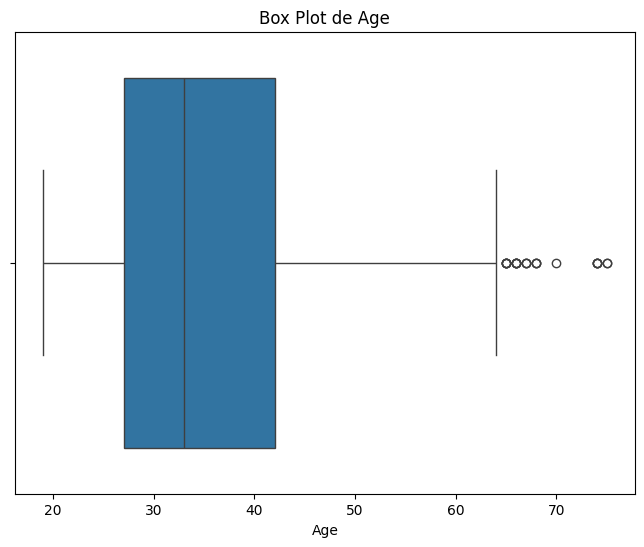

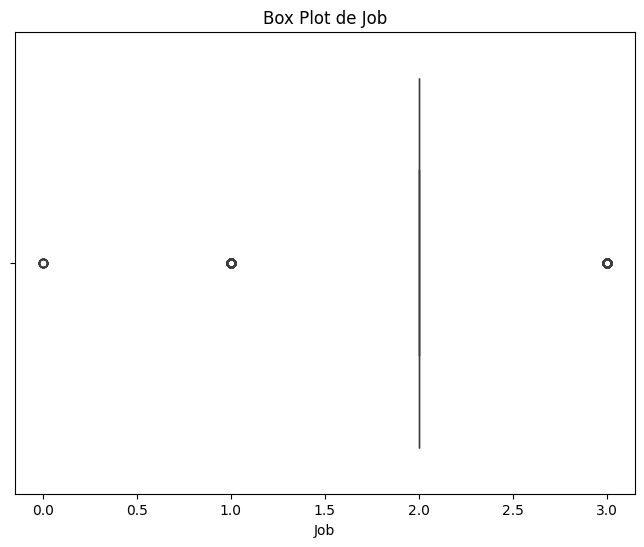

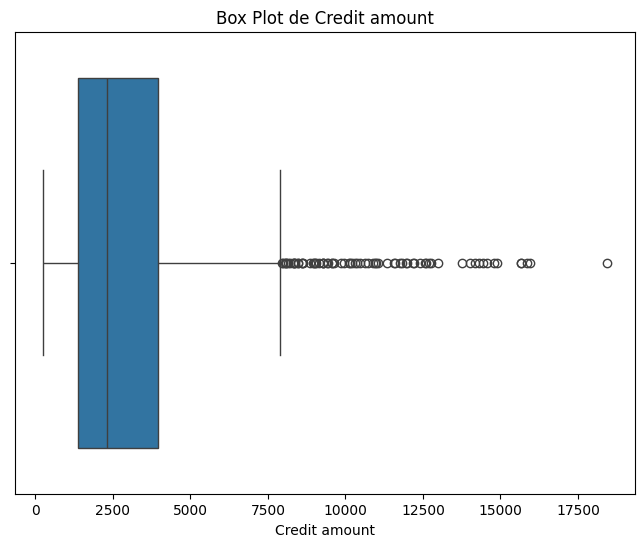

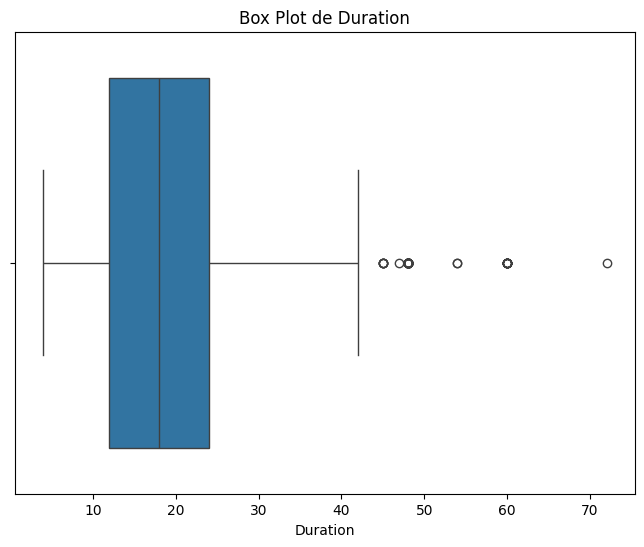

In [57]:
visualize_outliers(data, num_cols)

In [58]:
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,unknown,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,unknown,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


## <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> 🔻Step 2.1 Détection et gestion des duplications</span>

In [24]:
#Detection duplicata
data.duplicated().sum()

np.int64(0)

# <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> 🔻Step 2 |Feature engineering </span>

In [25]:
#feature engineering

In [59]:
#one hot encoding categorical columns
data = pd.get_dummies(data, columns=['Housing', 'Saving accounts', 'Checking account'], dtype=int)
#label encoding for Purpose
import sklearn.preprocessing as preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Purpose'] = label_encoder.fit_transform(data['Purpose'])
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Risk'] = data['Risk'].map({'bad': 0, 'good': 1})
data

,Unnamed: 0,Age,Sex,Job,Credit amount,Duration,Purpose,Risk,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Saving accounts_unknown,Checking account_little,Checking account_moderate,Checking account_rich,Checking account_unknown
0,0,67,0,2,1169,6,5,1,0,1,0,0,0,0,0,1,1,0,0,0
1,1,22,1,2,5951,48,5,0,0,1,0,1,0,0,0,0,0,1,0,0
2,2,49,0,1,2096,12,3,1,0,1,0,1,0,0,0,0,0,0,0,1
3,3,45,0,2,7882,42,4,1,1,0,0,1,0,0,0,0,1,0,0,0
4,4,53,0,2,4870,24,1,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1,1,1736,12,4,1,0,1,0,1,0,0,0,0,0,0,0,1
996,996,40,0,3,3857,30,1,1,0,1,0,1,0,0,0,0,1,0,0,0
997,997,38,0,2,804,12,5,1,0,1,0,1,0,0,0,0,0,0,0,1
998,998,23,0,2,1845,45,5,0,1,0,0,1,0,0,0,0,1,0,0,0


In [27]:
data.shape

(1000, 19)

In [30]:
data.to_csv('../../data/processed/preprocessed_data', index=False)
print("Preprocessed data saved successfully.")

(1000, 18)

In [32]:
X.columns

Index(['Age', 'Sex', 'Job', 'Credit amount', 'Duration', 'Purpose',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Saving accounts_unknown',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_rich', 'Checking account_unknown'],
      dtype='object')

# <span style= "font-family: Papyrus; font_size: 1em; font-style: underline; "> 🔻Step 2 | Modélisation
 </span>

### 2.1Chargement des fonctions necessaires

In [15]:
def plot_boxplot_of_probabilities(model, X_test, y_test, y_test_prob, title, threshold=0.5):
    """
    Trace une boîte à moustaches des probabilités prédites pour les faux positifs et les faux négatifs.

    Parameters:
    - model : le modèle de machine learning
    - X_test : les caractéristiques de test
    - y_test : les étiquettes de test
    - y_test_prob : les probabilités prédites pour les étiquettes de test
    - threshold : le seuil pour déterminer les prédictions positives (par défaut à 0.5)
    """
    # Conversion de y_test en série si ce n'est pas déjà le cas
    if isinstance(y_test, pd.DataFrame):
        y_test = y_test.squeeze()
    elif isinstance(y_test, np.ndarray):
        y_test = pd.Series(y_test)

    # Vérifier que y_test_prob est de la même longueur que y_test
    if len(y_test) != len(y_test_prob):
        raise ValueError("La longueur de y_test_prob doit être égale à celle de y_test")

    # Détermination des faux positifs et faux négatifs
    fp_probs = y_test_prob[(y_test_prob >= threshold) & (y_test == 0)]
    fn_probs = y_test_prob[(y_test_prob <= threshold) & (y_test == 1)]

    # Création de la boîte à moustaches
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=[fp_probs, fn_probs], notch=True, palette=['red', 'blue'])
    plt.xticks([0, 1], ['Faux Positifs', 'Faux Négatifs'])
    plt.ylabel('Probabilités Prédites')
    plt.title(title) #'Distribution des probabilités pour les Faux Positifs et Faux Négatifs'
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, model_name="Model"):
    """
    Tracer la courbe ROC pour les prédictions de probabilité d'un modèle.

    Parameters:
    - y_true : array, vrai labels des données de test.
    - y_pred_proba : array, probabilités prédites de la classe positive par le modèle.
    - model_name : str, le nom du modèle pour afficher dans le titre du graphique.

    Returns:
    - Aucun, affiche un graphique.
    """
    # Calcul des taux pour la courbe ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Tracé de la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

from sklearn.metrics import confusion_matrix, classification_report, recall_score, roc_auc_score, accuracy_score, precision_score, f1_score
def evaluate_tree_ensemble_model(model, X_train, y_train, X_test, y_test, y_train_proba, y_test_proba, threshold=0.5):
    """
    Evaluate the tree ensemble model by calculating performance metrics and displaying both confusion matrices and a table of metrics.

    Args:
        model: Trained tree ensemble model (e.g., RandomForest, XGBoost).
        X_train, y_train: Training data and labels.
        X_test, y_test: Testing data and labels.
        threshold: Probability threshold to determine class labels.
    """
    # Convert probabilities to binary predictions based on the threshold
    y_train_pred = (y_train_proba >= threshold).astype(int)
    y_test_pred = (y_test_proba >= threshold).astype(int)

    # Display confusion matrices
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(cm_train, annot=True, fmt="d", ax=ax[0], cmap="Blues")
    ax[0].set_title("Confusion Matrix (Train)")
    ax[0].set_xlabel("Predicted Labels")
    ax[0].set_ylabel("True Labels")
    sns.heatmap(cm_test, annot=True, fmt="d", ax=ax[1], cmap="Blues")
    ax[1].set_title("Confusion Matrix (Test)")
    ax[1].set_xlabel("Predicted Labels")
    ax[1].set_ylabel("True Labels")
    plt.show()

    # Calculate metrics
    metrics = {
        'Metric': ['Recall', 'AUC', 'Accuracy', 'Precision', 'F1 Score'],
        'Train': [
            recall_score(y_train, y_train_pred),
            roc_auc_score(y_train, y_train_proba),
            accuracy_score(y_train, y_train_pred),
            precision_score(y_train, y_train_pred),
            f1_score(y_train, y_train_pred)
        ],
        'Test': [
            recall_score(y_test, y_test_pred),
            roc_auc_score(y_test, y_test_proba),
            accuracy_score(y_test, y_test_pred),
            precision_score(y_test, y_test_pred),
            f1_score(y_test, y_test_pred)
        ]
    }

    # Create and print a DataFrame for displaying metrics
    results_df = pd.DataFrame(metrics)
    print(results_df.set_index('Metric'))
    return results_df

def plot_confidence_histogram(model, X_test, y_test, y_test_prob, title, threshold=0.5):
    """
    Trace un histogramme de confiance des probabilités prédites pour les faux positifs et les faux négatifs.

    Parameters:
    - model : le modèle de machine learning
    - X_test : les caractéristiques de test
    - y_test : les étiquettes de test
    - y_test_prob : les probabilités prédites pour les étiquettes de test
    - threshold : le seuil pour déterminer les prédictions positives (par défaut à 0.5)
    """
    # Conversion de y_test en série si ce n'est pas déjà le cas
    if isinstance(y_test, pd.DataFrame):
        y_test = y_test.squeeze()
    elif isinstance(y_test, np.ndarray):
        y_test = pd.Series(y_test)

    # Vérifier que y_test_prob est de la même longueur que y_test
    if len(y_test) != len(y_test_prob):
        raise ValueError("La longueur de y_test_prob doit être égale à celle de y_test")

    # Détermination des faux positifs et faux négatifs
    fp_probs = y_test_prob[(y_test_prob >= threshold) & (y_test == 0)]
    fn_probs = y_test_prob[(y_test_prob <= threshold) & (y_test == 1)]

    # Création de l'histogramme
    plt.figure(figsize=(12, 8))
    plt.hist(fp_probs, bins=30, alpha=0.5, label='Faux Positifs', color='red')
    plt.hist(fn_probs, bins=30, alpha=0.5, label='Faux Négatifs', color='blue')
    plt.xlabel('Probabilité prédite')
    plt.ylabel('Nombre d\'observations')
    plt.title(title)#Histogramme de Confiance des Prédictions
    plt.xlim(0, 1)
    plt.legend()
    plt.show()


def plot_feature_importances(model, feature_names, title, top_n=16):
    """
    Plot the top n feature importances of the given model.

    Args:
        model: The trained model, e.g., an instance of RandomForestClassifier or RandomForestRegressor.
        feature_names (list): A list of names corresponding to the features in the training data.
        top_n (int): The number of top features to display.
    """
    # Extract feature importances from the model
    importances = model.feature_importances_

    # Create a DataFrame for easier handling
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

    # Sort features according to importance
    feature_importances = feature_importances.sort_values(by='importance', ascending=False)

    # Select top n features
    feature_importances = feature_importances.head(top_n)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importances)

    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

### Préparation des donnees d'entrainement et de test

In [29]:
from sklearn.model_selection import train_test_split
# Séparations des features au target
X, y = data.drop('Risk', axis=1), data['Risk']
# Séparations en ensembles d'entrainement et de test pour les features et le target
X_train,X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=0)

### XGBoost model

In [39]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Définition de la grille d'hyperparamètres
param_grid = {
    'n_estimators': [1000],
    'max_depth': [15, 25],
    'min_child_weight': [2, 4],
    'gamma': [0.2, 0.3],
    'colsample_bytree': [0.6, 0.8],
    'subsample': [0.4, 0.5],
    'reg_alpha': [0.1, 0.2],
    'reg_lambda': [0.2, 0.4],
    'learning_rate': [0.05, 0.1]
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(
        objective='binary:logistic',
        random_state=0,
        eval_metric='logloss'  # Utiliser 'eval_metric' au lieu de l'ancien 'use_label_encoder'
    ),
    param_grid=param_grid,
    scoring='f1',  # Utiliser le score F1 pour l'évaluation
    cv=10,
    verbose=2,
    n_jobs=-1
)

# Exécution de la recherche en grille
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs hyperparamètres trouvés : ", grid_search.best_params_)

# Modèle avec les meilleurs hyperparamètres
best_model = grid_search.best_estimator_


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
# Récupération du meilleur modèle
xgb_model = grid_search.best_estimator_

In [ ]:
import joblib
joblib.dump(xgb_model, '../../models/xgb_model_v0.pkl')
print("Modèle enregistré avec succès.")

Modèle enregistré avec succès.


In [ ]:
y_test_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_train_proba_xgb = xgb_model.predict_proba(X_train)[:, 1]
threshold = 0.5
title_xgb  = "XGBoost"

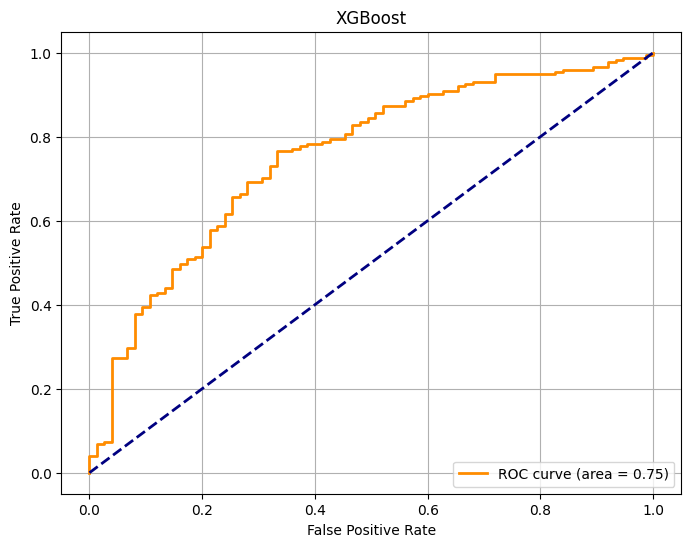

In [ ]:
plot_roc_curve(y_test, y_test_proba_xgb, model_name=title_xgb)

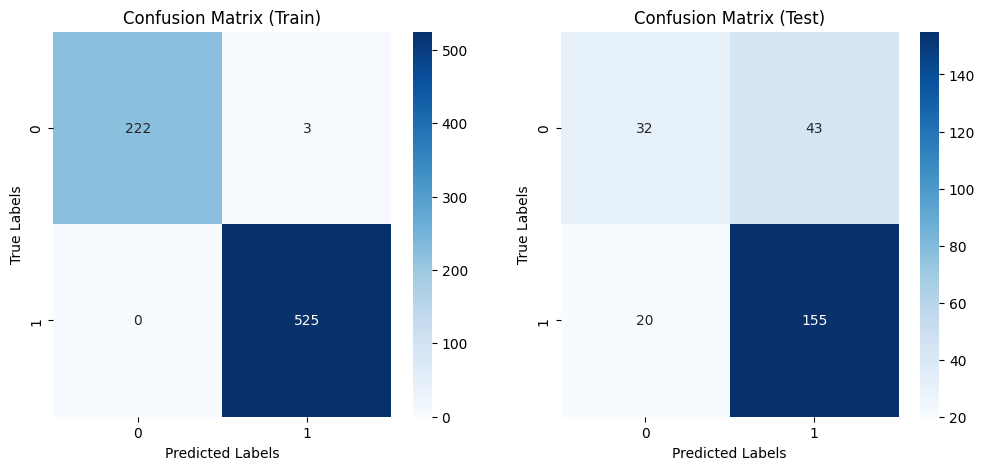

              Train      Test
Metric                       
Recall     1.000000  0.885714
AUC        1.000000  0.753905
Accuracy   0.996000  0.748000
Precision  0.994318  0.782828
F1 Score   0.997151  0.831099


In [ ]:
resultat_xgb = evaluate_tree_ensemble_model(xgb_model, X_train, y_train, X_test, y_test, y_train_proba_xgb, y_test_proba_xgb)

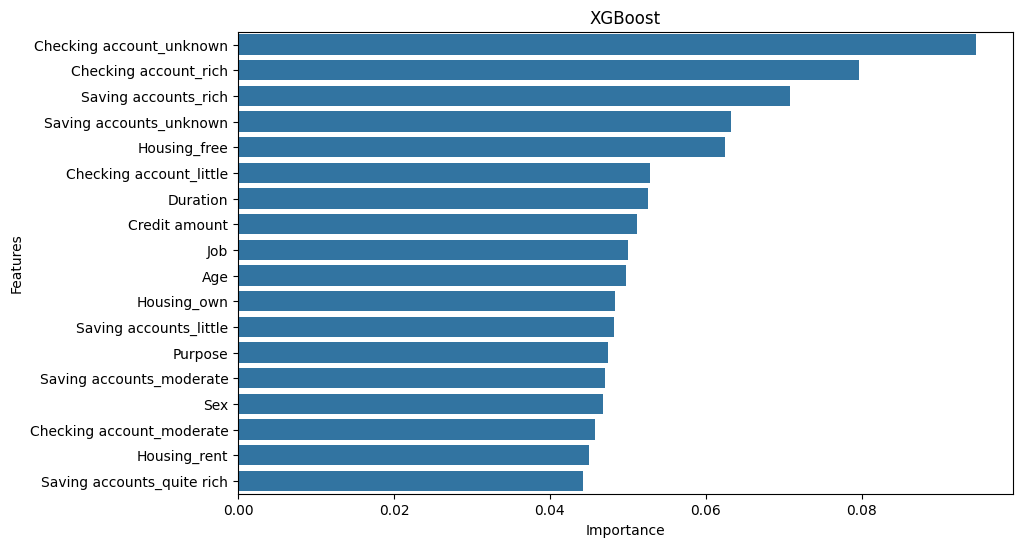

In [ ]:
feature_names = X_train.columns.tolist()
plot_feature_importances(xgb_model, feature_names,title_xgb,len(feature_names))

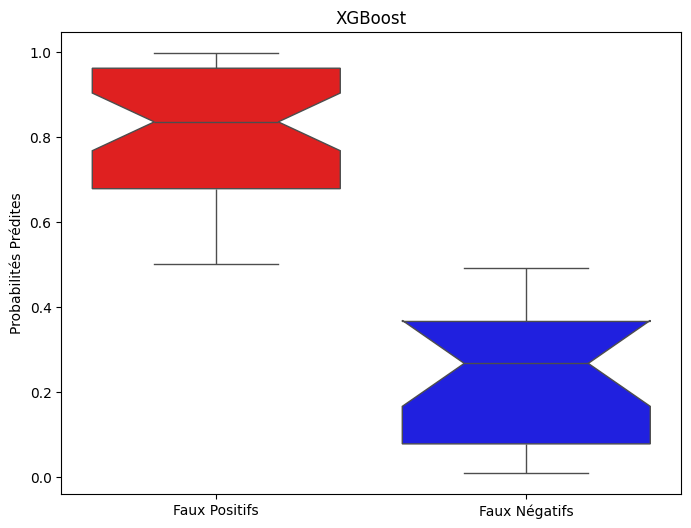

In [ ]:
plot_boxplot_of_probabilities(xgb_model, X_test, y_test, y_test_proba_xgb, title_xgb)

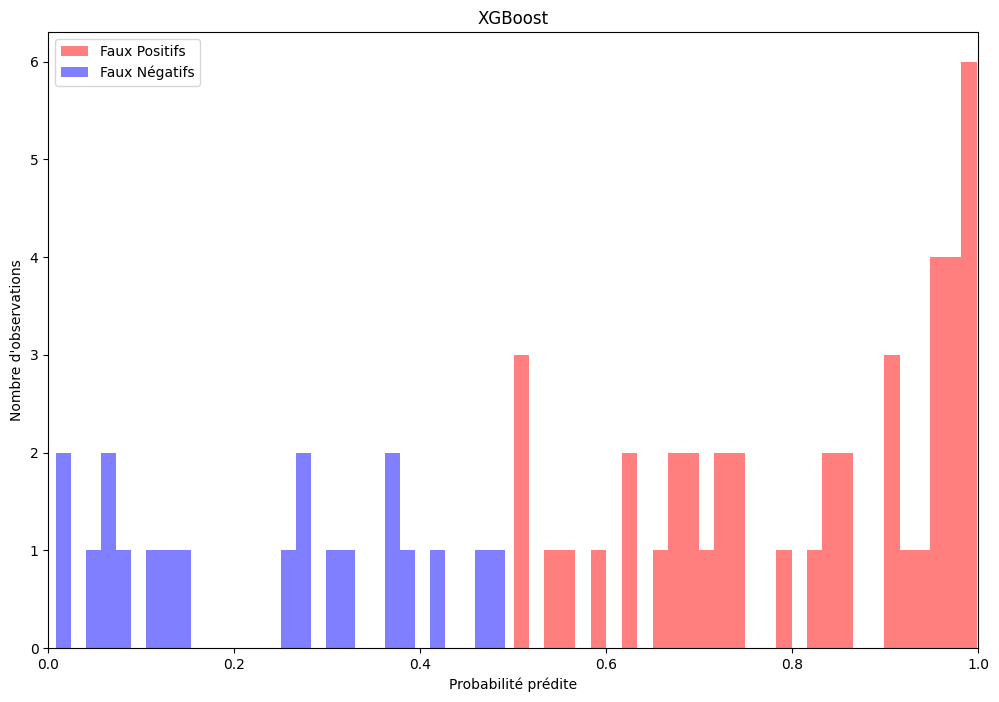

In [ ]:
plot_confidence_histogram(xgb_model, X_test, y_test, y_test_proba_xgb, title_xgb)

### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

# Définition de la grille d'hyperparamètres
param_grid = {
    'n_estimators': [200, 300],  # Expanded range of estimators
    'max_depth': [10, 15, 25],  # Explore unlimited depth and other values
    'min_samples_split': [2, 5, 10],  # Wider range for splitting
    'min_samples_leaf': [1, 2, 4],  # Keep as is
    'max_features': ['sqrt', 'log2'],  # Include more options for feature subsets
    'criterion': ['gini', 'entropy']  # Explore different splitting criteria
}

In [41]:
# Création de l'objet GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(n_jobs=2, verbose=True, random_state=0),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=4
)

# Exécution de la recherche en grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs hyperparamètres trouvés : ", grid_search.best_params_)
# Get the best parameters and the best model
best_params = grid_search.best_params_
rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


Meilleurs hyperparamètres trouvés :  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.6s finished


In [42]:
threshold = 0.5
title = "Random Forest"

In [43]:
import joblib
joblib.dump(rf_model, '../../models/rf_model_0_1.pkl')
print("Modèle enregistré avec succès.")

Modèle enregistré avec succès.


In [44]:
y_test_proba = rf_model.predict_proba(X_test)[:, 1]
y_train_proba = rf_model.predict_proba(X_train)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.0s finished


In [19]:
y_train

732    1
398    0
933    1
72     1
340    1
      ..
634    0
19     1
172    0
739    0
408    1
Name: Risk, Length: 750, dtype: int64

In [18]:
X_train

,Age,Sex,Job,Credit amount,Duration,Purpose,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich
732,44,1,1,760,8,5,0,1,0,1,0,0,0,0,1,0
398,46,0,2,1223,12,1,0,0,1,1,0,0,0,0,1,0
933,42,0,2,522,12,5,0,1,0,0,0,1,0,0,0,0
72,51,0,3,1164,8,7,1,0,0,1,0,0,0,1,0,0
340,24,1,2,5743,24,3,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,25,1,1,1355,24,1,0,1,0,1,0,0,0,0,1,0
19,31,0,2,3430,24,5,0,1,0,0,0,1,0,0,0,0
172,34,1,3,2064,24,4,0,1,0,1,0,0,0,0,1,0
739,26,1,1,4280,30,0,0,0,1,0,1,0,0,0,1,0


In [1]:
resultat_xgb = evaluate_tree_ensemble_model(rf_model, X_train, y_train, X_test, y_test, y_train_proba, y_test_proba, threshold=0.5)

NameError: name 'evaluate_tree_ensemble_model' is not defined

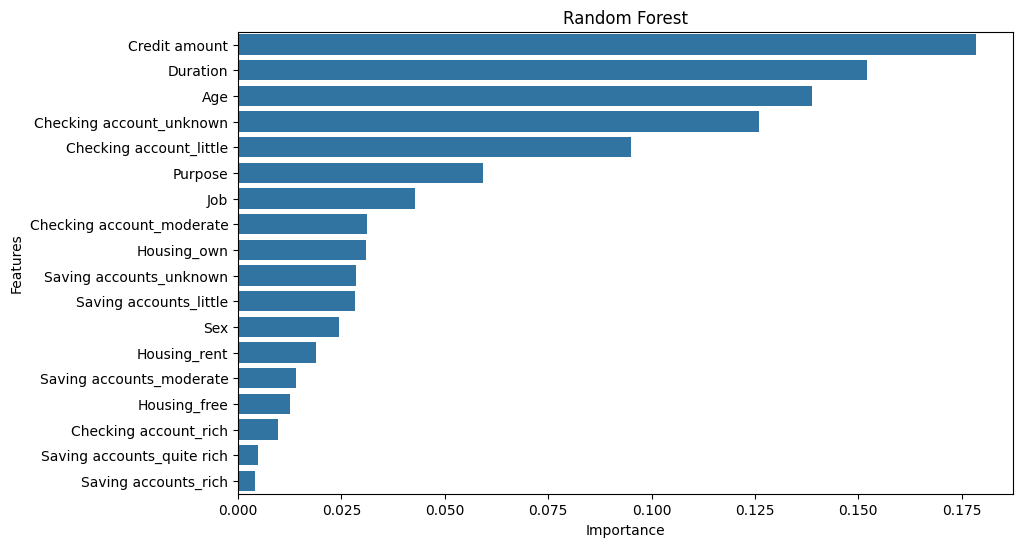

In [45]:
feature_names = X_train.columns.tolist()
plot_feature_importances(rf_model, feature_names,title, len(feature_names))